# Question1: Handwriting Recognition using Machine Learning!

# a - Check the dataset “Digit” in HW5 package. 

It includes 1700 small images (8x8 pixels), each one includes a hand-written digit (0-9). You have to download the corresponding csv file that includes the labels of the images. The goal is to build a Machine Learning Algorithm that can recognize the hand-written digits!

* Import the following two libraries to work with images:

   **import matplotlib.image as mpimg**

   **import matplotlib.pyplot as plt**


* You can use:

   **mpimg.imread(file_name)** to load an image
   
   **plt.imshow(image_name, cmap=plt.cm.gray_r, interpolation='nearest')** to show an image.

#### Add "**matplotlib inline**" at top of your code to make sure that the images will be shown inside the Jupyter explorer page.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [100]:
img = mpimg.imread('./Digit/27.jpg')

In [101]:
img

array([[  0,   3,   0, 123, 222, 229,  36,   0],
       [  6,   9,   0, 113, 156, 239, 169,   1],
       [  4,   0,   0,   0,  11, 220, 156,   4],
       [  0,  55, 137, 173, 203, 255, 129,   0],
       [ 13, 121, 254, 255, 255, 252,  97,   3],
       [  0,   0,   6,   3, 169, 227,  37,   0],
       [  1,  14,   0, 140, 255,  99,   0,   9],
       [  0,   0,  27, 177, 202,  23,   0,   0]], dtype=uint8)

In [102]:
print(img.shape)

(8, 8)


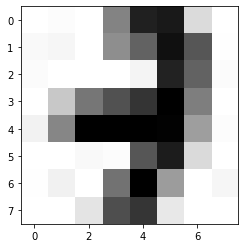

In [103]:
%matplotlib inline

plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')

## b - Build the feature matrix and label vector: 

#### Each image is considered as a data sample with pixels as features. 
#### Thus, to build the feature table you have to convert each 8x8 image into an array of 64 elements (i.e. 64 pixels)
#### Put it as a row of the feature matrix with 64 feature columns.

In [6]:
# Feature matrix

path = './Digit/'
extension = '.jpg'
col_labels = []
X = []

for i in range(1700):
    fileName = path + str(i) + extension
    imgArr = mpimg.imread(fileName).flatten()
    X.append(imgArr)

for i in range(64):
    col_labels.append(i)
    
X = pd.DataFrame(X, columns=col_labels)    

# Label vector

label_df = pd.read_csv("label.csv")
y = label_df['digit label']

## c - Use sklearn functions to split the dataset into testing and training sets with the following parameters: test_size=0.1, random_state=3.


In [7]:
from sklearn.model_selection import train_test_split

# Randomly splitting the original dataset into training set and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=3)

# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(1105, 64)
(1105,)
(595, 64)
(595,)


## d - Use scikit-learn “Random Forest” classifier to recognize the hand-written digits based on the training/testing datasets that you built in part (c). Use this command to import and define your classifier:

* **from sklearn.ensemble import RandomForestClassifier**

* **my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=3)**
  
Use **my_RandomForest.fit** for training your random forest classifier and **my_RandomForest.predict** for prediction. 

#### Test your Machine Learning Algorithm on testing set (from part(c)), and calculate and report the accuracy.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

my_RandomForest = RandomForestClassifier(n_estimators = 19, bootstrap = True, random_state=3)

# for training: 
my_RandomForest.fit(X_train, y_train)

# for testing/prediction:  
y_predict_rf = my_RandomForest.predict(X_test)

accuracy =  accuracy_score(y_test, y_predict_rf)

print("Random Forest: ", accuracy)

Random Forest:  0.9478991596638655


## e - Write some codes to find which one of the data samples (i.e. which images) have been misclassified (classified incorrectly) in your testing set. 

Then, use the following command to show the misclassified images:

* **plt.imshow(image_name, cmap=plt.cm.gray_r, interpolation='nearest')**


27.jpg :  predict -  4 / actual -  7
378.jpg :  predict -  3 / actual -  8
1660.jpg :  predict -  7 / actual -  4
1692.jpg :  predict -  4 / actual -  5
843.jpg :  predict -  4 / actual -  6
103.jpg :  predict -  8 / actual -  3
1606.jpg :  predict -  8 / actual -  3
69.jpg :  predict -  7 / actual -  9
1690.jpg :  predict -  8 / actual -  3
596.jpg :  predict -  2 / actual -  1
46.jpg :  predict -  8 / actual -  5
37.jpg :  predict -  3 / actual -  9
1662.jpg :  predict -  5 / actual -  9
1573.jpg :  predict -  4 / actual -  0
1553.jpg :  predict -  1 / actual -  8
816.jpg :  predict -  9 / actual -  8
1468.jpg :  predict -  9 / actual -  8
1602.jpg :  predict -  8 / actual -  3
985.jpg :  predict -  9 / actual -  3
737.jpg :  predict -  5 / actual -  3
239.jpg :  predict -  1 / actual -  4
670.jpg :  predict -  1 / actual -  4
586.jpg :  predict -  6 / actual -  1
677.jpg :  predict -  1 / actual -  9
1588.jpg :  predict -  2 / actual -  3
492.jpg :  predict -  8 / actual -  6
792.jp

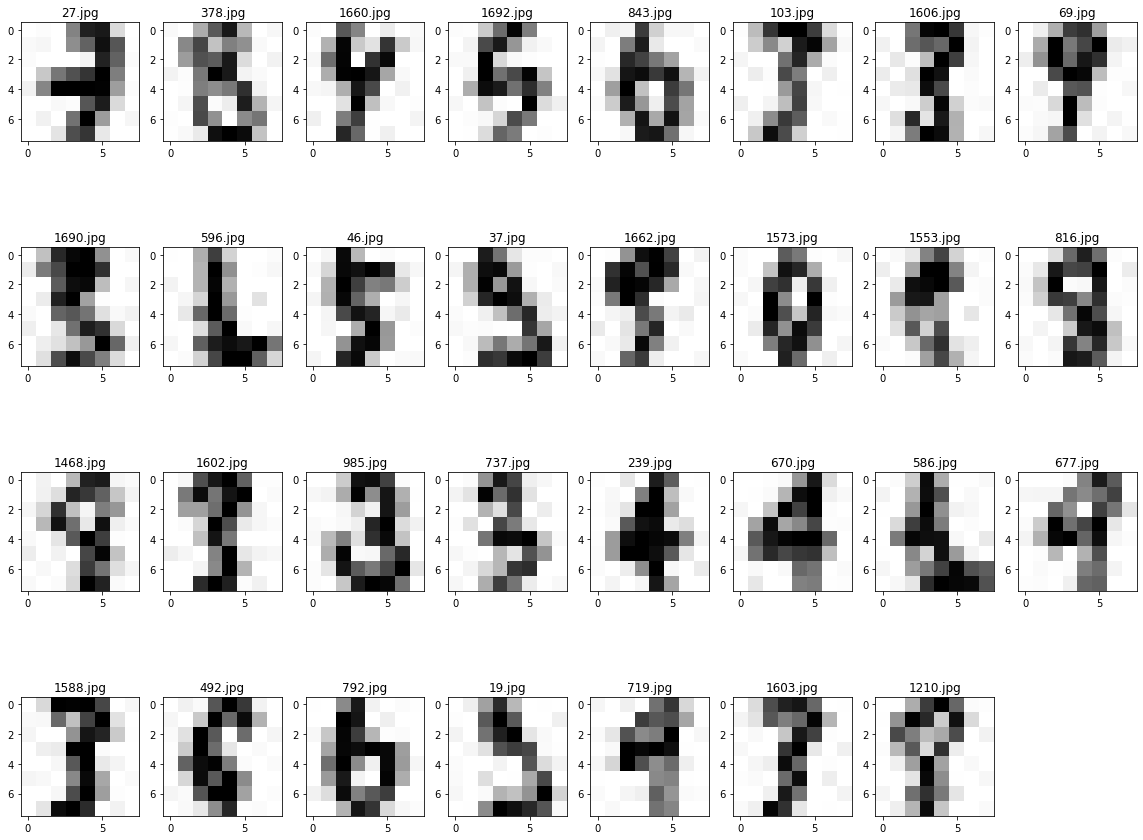

In [107]:
%matplotlib inline

misclassifiedImg = []
path = './Digit/'
extension = '.jpg'

fig = plt.figure(figsize=(20, 20))
columns = 8
rows = 5

# ax enables access to manipulate each of subplots
ax = []

for i in range(int(y_test.shape[0])):
    if y_predict_rf[i] != y_test.values[i]:
        print(str(y_test.index.values[i]) + extension, ": ", "predict - ",y_predict_rf[i], "/ actual - ", y_test.values[i])
        misclassifiedImg.append(y_test.index.values[i])
        


for i in range(len(misclassifiedImg)):
    fileName = path + str(misclassifiedImg[i]) + extension
    img = mpimg.imread(fileName)

    ax.append(fig.add_subplot(rows, columns, i + 1))
    ax[-1].set_title(str(misclassifiedImg[i]) + extension)  # set title
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')

